# Bank of America Consumer Complaint Analysis using Python

# 1. Importing Libraries and Loading Data

In [3]:
# run these commands in the terminal to install required libraries (pip must be installed in the environment): 
# pip install pandas
# pip install matplotlib
# pip install seaborn

# then import them in the codebase
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Read the csv file with the pandas
data_frame=pd.read_csv('C:\dev\data_analysis\Consumer_Complaints.csv')

In [ ]:
# Read the Header content and the number of rows specified (default is 5)
data_frame.head(2)

In [ ]:
# info() prints a concise summery of the data frame
data_frame.info()

In [ ]:
#print the number of unique values
data_frame.nunique()

In [ ]:
#print the number of null values in all columns
data_frame.isnull()

#print the number of null values in each columns (uncomment to see the sum of all)
data_frame.isnull().sum()

# 2. Data Cleaning and Preprocessing

In [19]:
# handling missing values in columns
# changing the missing values in the 'Timely response?'' column to 'Under Review'
data_frame['Timely response?'].fillna('Under Review',inplace = True)

In [ ]:
#changing the missing values in the other columns to 'NA'
data_frame.fillna('NA', inplace = True)

In [ ]:
data_frame.head()

In [ ]:
# Convert date columns to datetime format
data_frame['Date submitted'] = pd.to_datetime(data_frame['Date submitted'], format='%Y-%m-%d')
data_frame['Date received'] = pd.to_datetime(data_frame['Date received'], format='%Y-%m-%d')

In [ ]:
#shortening the names of certain products for ease of visualisation
data_frame['Product'] = data_frame['Product'].replace({
    'Money transfer, virtual currency, or money service': 'Money Transfer Services',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Report Services',
    'Vehicle loan or lease': 'Vehicle Finance Options',
    'Payday loan, title loan, or personal loan': 'Short Term Loans'
})

In [ ]:
data_frame.head()

# 3. Exploratory Data Analysis

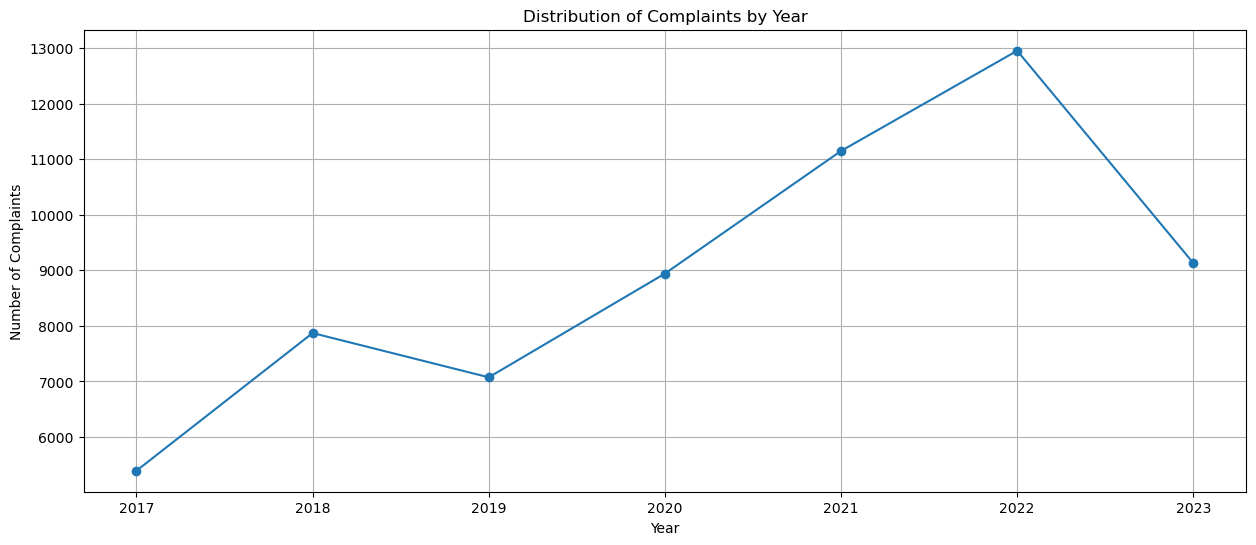

In [ ]:
# Visualize the distribution of complaints over time
data_frame['Year'] = data_frame['Date submitted'].dt.year

# Create time series for complaints by year (assuming 'Year' is already a numerical column)
year_counts = data_frame['Year'].value_counts().sort_index()

# Line chart for complaint distribution
plt.figure(figsize=(15, 6))
year_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Distribution of Complaints by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True)  # Add gridlines for better readability
plt.show()


We can see increase in number of complaints from 2019-2022 and then a sharp decline in number of complaints after 2022. 

In [ ]:
# Display the average time difference between submission and receiving
data_frame['Time to Receive'] = data_frame['Date received'] - data_frame['Date submitted']
print("\nAverage time to receive complaint:")
print(data_frame['Time to Receive'].mean())



Average time to receive complaint:
1 days 05:23:50.187472007


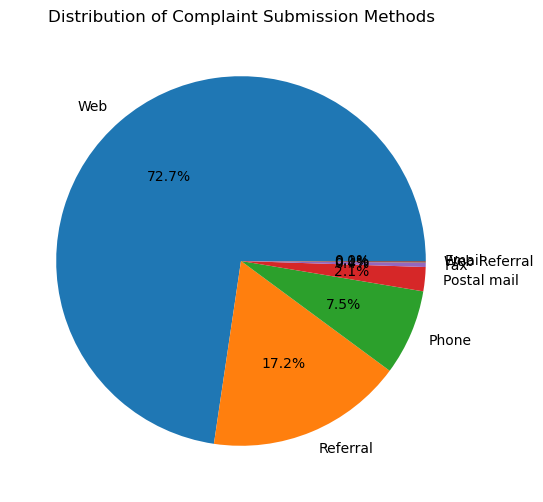

In [ ]:
# Distribution of complaint submission methods
plt.figure(figsize=(10, 6))
data_frame['Submitted via'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Complaint Submission Methods')
plt.ylabel('')
plt.show()

Web and Referral are the major channels of complaint submission

## 3.1 Temporal Analysis

In [ ]:
data_frame['Month'] = data_frame['Date submitted'].dt.month


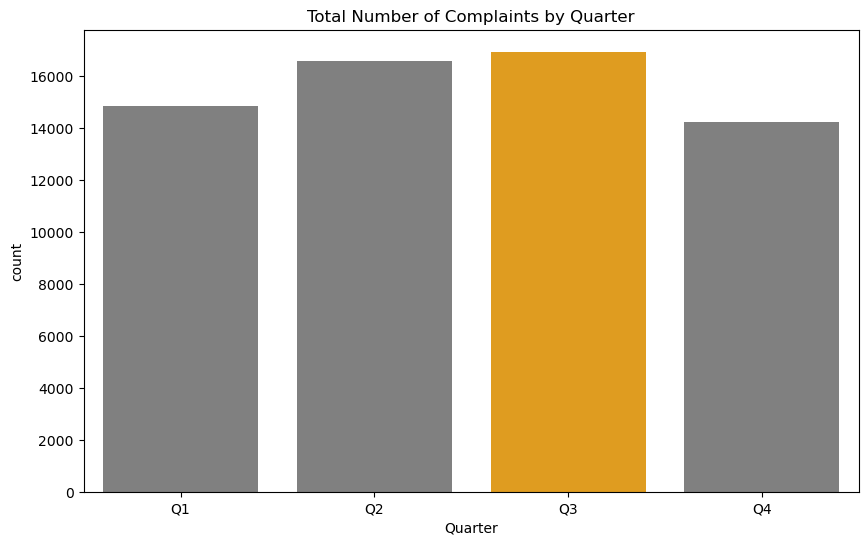

In [ ]:

# Create a new column for Quarter
data_frame['Quarter'] = pd.to_datetime(data_frame[['Year', 'Month']].assign(DAY=1)).dt.to_period('Q')

# Extract the quarter period (e.g., Q1, Q2, etc.) without the year
data_frame['Quarter_Short'] = data_frame['Quarter'].dt.strftime('Q%q')

# Define a custom color palette
palette = ['gray', 'gray', 'orange', 'gray']

# Plot quarterly trend
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter_Short', data=data_frame, order=['Q1', 'Q2', 'Q3', 'Q4'], palette=palette)
plt.title('Total Number of Complaints by Quarter')
plt.xlabel('Quarter')
plt.show()

Q3 is when we receive the most complaints. In Q4, there are lowest number of complaints

## 3.2 Product and Issue Analysis:

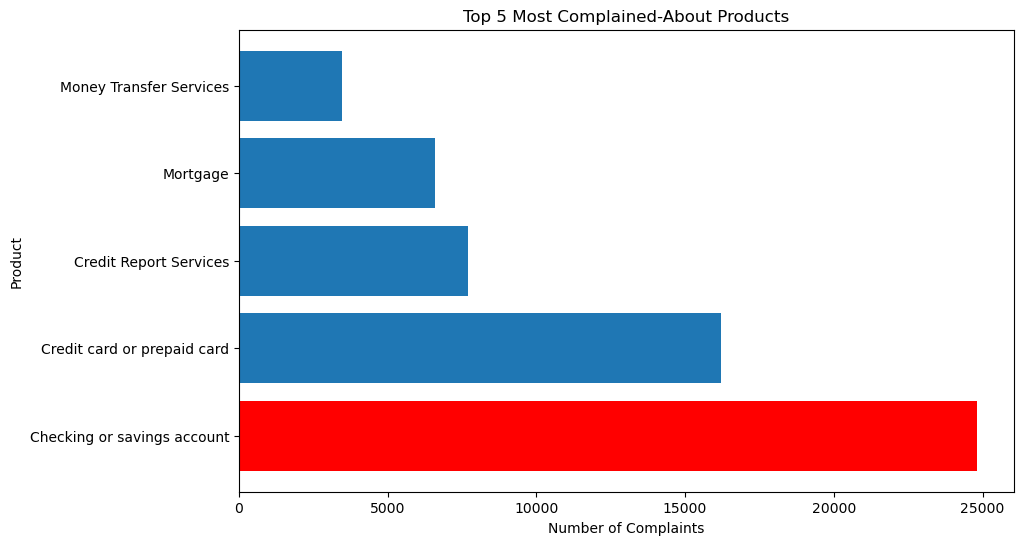

In [ ]:
#  Analyzing Most Complained-About Products
product_complaints = data_frame['Product'].value_counts()
# Identify the top 5 most complained-about products
top_5_products_complain = product_complaints.nlargest(5)

top_5_products_complain

import matplotlib.pyplot as plt

# Create a column chart
plt.figure(figsize=(10,6))
plt.barh(top_5_products_complain.index, top_5_products_complain.values)

# Highlight the 'Checking or savings account' bar
for i, product in enumerate(top_5_products_complain.index):
    if product == 'Checking or savings account':
        plt.barh(product, top_5_products_complain.values[i], color='red')

# Set the title and labels
plt.title('Top 5 Most Complained-About Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')

# Show the plot
plt.show()

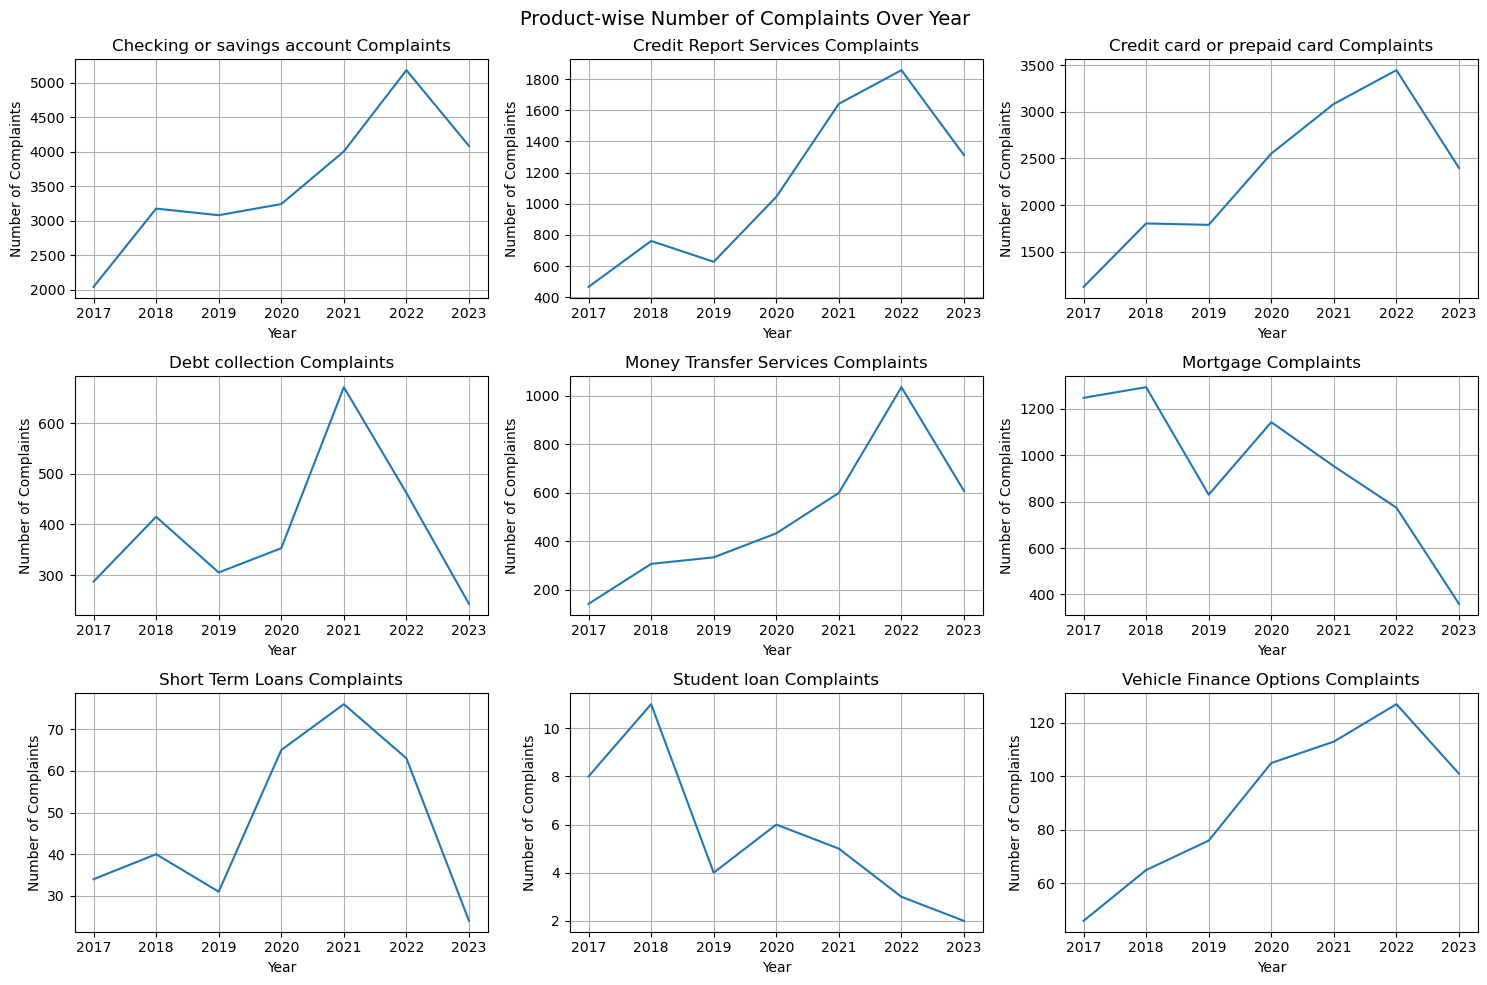

In [ ]:
# Product wise number of complaints over the years
# Create the subplot figure
fig, axes = plt.subplots(nrows=int(data_frame['Product'].nunique() / 3),  # Adjust rows for number of products
                         ncols=3, figsize=(15, 10))  # Adjust columns and figure size as needed

# Create line charts for each product (one chart per subplot)
product_counts = data_frame.groupby(['Product', 'Year'])['Year'].count().unstack()
for idx, (product, product_data) in enumerate(product_counts.iterrows()):
  row = int(idx // 3)
  col = idx % 3
  product_data.plot(kind='line', ax=axes[row, col], title=f"{product} Complaints")
  axes[row, col].set_xlabel('Year')
  axes[row, col].set_ylabel('Number of Complaints')
  axes[row, col].grid(True)

# Adjust layout and display the chart
fig.suptitle('Product-wise Number of Complaints Over Year', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Identifying common issue categories
issue_counts = data_frame['Issue'].value_counts()
top_5_issues = issue_counts.nlargest(5)
top_5_issues

Issue
Managing an account                                15109
Incorrect information on your report                4931
Problem with a purchase shown on your statement     4415
Closing an account                                  2953
Trouble during payment process                      2827
Name: count, dtype: int64

In [ ]:
# Product-wise major issues
product_issue_counts = data_frame.groupby('Product')['Issue'].value_counts().unstack(fill_value=0)

# Print the results
for product in product_issue_counts.index:
  issue_counts = product_issue_counts.loc[product]
  print(f"\nProduct: {product}")
  print(issue_counts.nlargest(3).sort_values(ascending=False))  # Get top 3 issues and sort by frequency




Product: Checking or savings account
Issue
Managing an account    15109
Closing an account      2953
Opening an account      2725
Name: Checking or savings account, dtype: int64

Product: Credit Report Services
Issue
Incorrect information on your report                                                4145
Problem with a credit reporting company's investigation into an existing problem    1641
Improper use of your report                                                         1517
Name: Credit Report Services, dtype: int64

Product: Credit card or prepaid card
Issue
Problem with a purchase shown on your statement    4415
Getting a credit card                              1867
Other features, terms, or problems                 1633
Name: Credit card or prepaid card, dtype: int64

Product: Debt collection
Issue
Attempts to collect debt not owed                      1351
Written notification about debt                         487
Took or threatened to take negative or legal action     380


## 3.3 Complaint Resolution Analysis

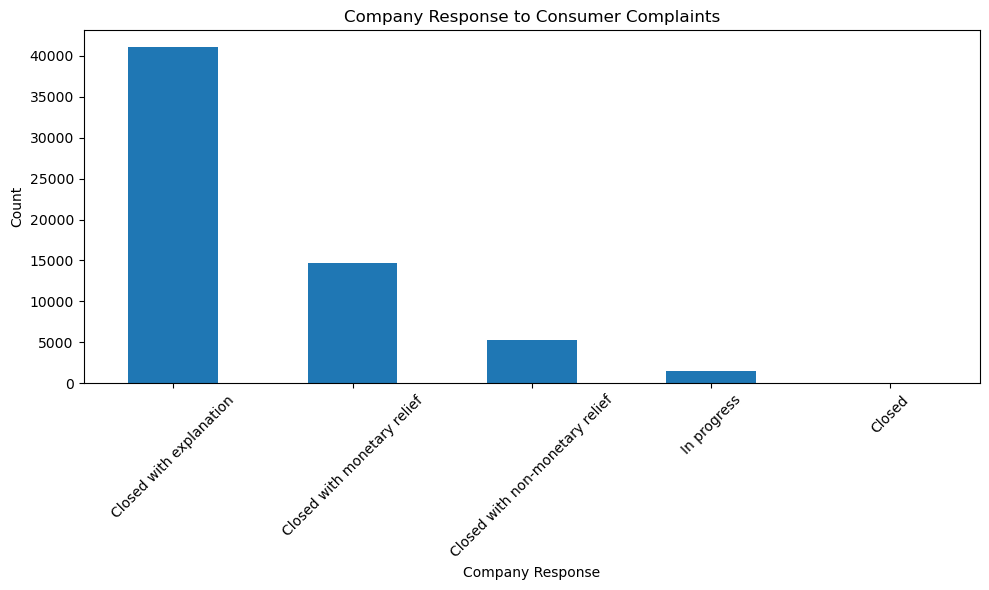

In [ ]:
consumer_resolution_counts = data_frame['Company response to consumer'].value_counts()
consumer_resolution_counts


plt.figure(figsize=(10, 6))
consumer_resolution_counts.plot(kind='bar')
plt.title('Company Response to Consumer Complaints')
plt.xlabel('Company Response')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
public_resolution_counts = data_frame['Company public response'].value_counts()
public_resolution_counts

Company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            60311
NA                                                                                                                          2175
Company believes the complaint provided an opportunity to answer consumer's questions                                         12
Company believes the complaint is the result of a misunderstanding                                                             7
Company believes it acted appropriately as authorized by contract or law                                                       6
Company believes complaint caused principally by actions of third party outside the control or direction of the company        3
Company disputes the facts presented in the complaint                                                                          2
Name: count, dtype: int64

Most issues are resolved with an explanation to the consumer and with no public response. However, we will focus on complaints which are closed with monetary relief

In [ ]:
# Total complaints that are closed with monetary relief
monetary_relief_complaints = data_frame[data_frame['Company response to consumer'] == 'Closed with monetary relief']

print("Total complaints closed with monetary relief:", len(monetary_relief_complaints))
# Now 'monetary_relief_complaints' contains only relevant rows
top_monetary_relief_issues = monetary_relief_complaints['Issue'].value_counts()

# the top 3 'top_monetary_relief_issues' 
print("Top 3 issues that are closed with monetary relief:",top_monetary_relief_issues.nlargest(3))

Total complaints closed with monetary relief: 14697
Top 3 issues that are closed with monetary relief: Issue
Managing an account                                             5206
Problem with a purchase shown on your statement                 1811
Problem with a lender or other company charging your account     978
Name: count, dtype: int64


In [34]:
# Now 'monetary_relief_complaints' contains only relevant rows
top_monetary_relief_products = monetary_relief_complaints['Product'].value_counts()

# Top 3 products with issues that required monetary relief
top_monetary_relief_products.nlargest(3)

Product
Checking or savings account    8027
Credit card or prepaid card    4798
Mortgage                        750
Name: count, dtype: int64

In [ ]:
def product_wise_issue_analysis(monetary_relief_complaints, top_n=1):
  """
  Analyzes issues associated with monetary relief on a product-by-product basis.

  Args:
      monetary_relief_complaints: A data_frame containing complaints with monetary relief.
      top_n (optional): The number of top issues to return for each product (default: 1).

  Returns:
      A dictionary where keys are product categories and values are the top-n most frequent issues 
      for that product (Series).
  """
  product_wise_issues = {}
  for product in monetary_relief_complaints['Product'].unique():
    product_complaints = monetary_relief_complaints[monetary_relief_complaints['Product'] == product]
    issue_counts = product_complaints['Issue'].value_counts()
    top_n_issues = issue_counts.nlargest(top_n)  # Get the top-n most frequent issues
    product_wise_issues[product] = top_n_issues
  return product_wise_issues


In [36]:
#product wise issue analysis for complaints which are closed with monetary relief
product_wise_issue_analysis_results = product_wise_issue_analysis(monetary_relief_complaints)


for product, issue_counts in product_wise_issue_analysis_results.items():
  print(f"\nProduct: {product}")
  print(issue_counts)



Product: Money Transfer Services
Issue
Fraud or scam    329
Name: count, dtype: int64

Product: Checking or savings account
Issue
Managing an account    5206
Name: count, dtype: int64

Product: Credit card or prepaid card
Issue
Problem with a purchase shown on your statement    1811
Name: count, dtype: int64

Product: Debt collection
Issue
Attempts to collect debt not owed    48
Name: count, dtype: int64

Product: Mortgage
Issue
Trouble during payment process    456
Name: count, dtype: int64

Product: Credit Report Services
Issue
Incorrect information on your report    145
Name: count, dtype: int64

Product: Short Term Loans
Issue
Charged fees or interest you didn't expect    12
Name: count, dtype: int64

Product: Vehicle Finance Options
Issue
Managing the loan or lease    29
Name: count, dtype: int64

Product: Student loan
Issue
Dealing with your lender or servicer    1
Name: count, dtype: int64


## 3.4 Timely Resolution Analysis

Timely response?
Yes             58619
No               2403
Under Review     1494
Name: count, dtype: int64


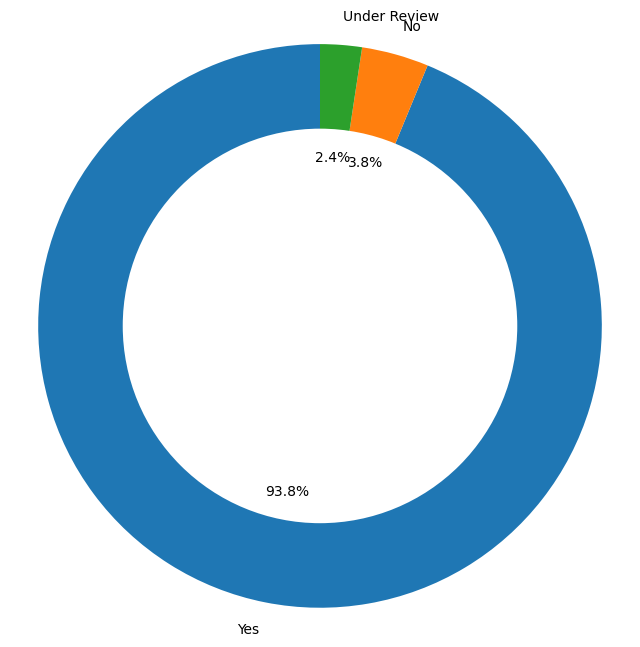

In [ ]:
# Get value counts for the 'Timely response?' column
response_counts = data_frame['Timely response?'].value_counts()
print(response_counts)


# Get value counts for the 'Timely response?' column
response_counts = data_frame['Timely response?'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.show()

Most Complaints are resolved timely. Let us analyse the complaints that are not.

In [ ]:
#  Overall Rate of Untimely Responses:
data_frame['Timely response?'].value_counts

untimely_complaints_pct = (data_frame['Timely response?'] == 'No').mean() * 100
print(f"Percentage of Untimely Responses: {untimely_complaints_pct:.2f}%")


Percentage of Untimely Responses: 3.84%


In [ ]:
# Issue Breakdown for Untimely Responses:
untimely_responses = data_frame[data_frame['Timely response?'] == 'No']
issue_counts_untimely = untimely_responses['Issue'].value_counts()
print("\nTop Issues in Untimely Responses:")
print(issue_counts_untimely.head())  # Display the top few issues



Top Issues in Untimely Responses:
Issue
Managing an account                                497
Incorrect information on your report               322
Problem with a purchase shown on your statement    197
Attempts to collect debt not owed                  118
Closing an account                                 116
Name: count, dtype: int64


In [46]:
# Product Breakdown for Untimely Responses:
product_counts_untimely = untimely_responses['Product'].value_counts()
print("\nTop Products with issues resolved Untimely:")
print(product_counts_untimely.head())  # Display the top few products


Top Products with issues resolved Untimely:
Product
Checking or savings account    867
Credit card or prepaid card    689
Credit Report Services         475
Debt collection                173
Money Transfer Services        140
Name: count, dtype: int64


In [ ]:
filtered_data = data_frame[(data_frame['Timely response?'] == 'No') & (data_frame['Company response to consumer'] == 'Closed with monetary relief')]
proportion = len(filtered_data) / len(data_frame[data_frame['Timely response?'] == 'No'])
print(proportion)

0.28714107365792757


28% of untimely responses are closed with monetary relief